# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!
Bagging bikin banyak model yang berdiri sendiri-sendiri, terus hasilnya dirata-rata (atau voting) biar lebih stabil dan nggak gampang overfitting.
kalau boosting model kerja bareng tapi secara berantai, saling bantu buat ngurangin kesalahan.

# Import Data & Libraries

In [ ]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df_X = pd.DataFrame(X, columns=data.feature_names)
df = df_X.copy()
df['target'] = y
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [ ]:
clf = clf = RandomForestClassifier() # gunakan RandomForestClassifier dari Sklearn
clf.fit(X_train, y_train)
preds = preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.9649122807017544


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [ ]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.random_state = random_state
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):

            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )

            X_sample, y_sample = self._bootstrap_samples(X, y)

            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        predictions = [self._most_common_label(pred) for pred in tree_preds]

        return predictions

## Predict Using Random Forest

In [ ]:
def accuracy(y_true, y_pred):
     return np.sum(y_true == y_pred) / len(y_true)

clf = clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy:", accuracy(y_test, predictions))

Accuracy: 0.956140350877193


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [ ]:
# define and train the model using GradientBoostingClassifier from Sklearn
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.956140350877193


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner= DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model

            Fm += self.lr * h_i.predict(X)

            # Plotting
            ax = axs[i]
            ax.scatter(range(len(y)), y, color='blue', label='True', s=10)
            ax.scatter(range(len(y)), sigmoid(Fm), color='red', label='Pred', s=10)
            ax.set_title(f"Iter {i+1}")
            ax.legend(fontsize=6)

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


## Predict Using Gradient Boosting

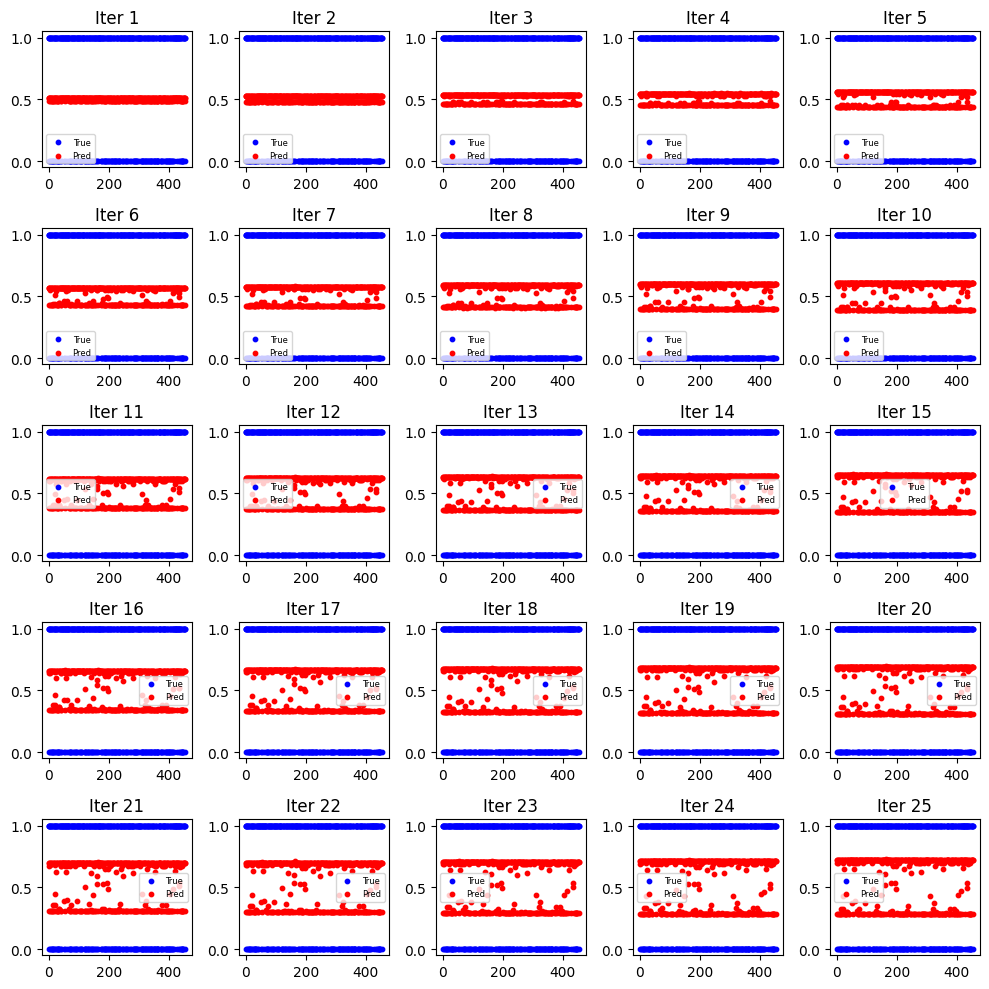

In [ ]:
# define and train the model
clf = gradientBoostingClassifier(lr=0.1, n_estimators=25)
clf.fit(X_train, y_train, max_depth=3)

In [ ]:
# get predictions:
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy:", np.mean(y_test == preds))

Accuracy: 0.956140350877193


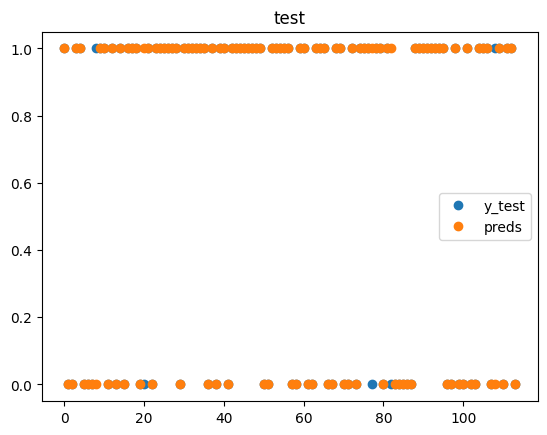

In [ ]:
# plot predictions vs. the ground truth:
fig, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()